Hebani Duggal hd288 Problem Set 7

Discussed high level strategies with ta323, tw292, and mac482

In [1156]:
#Question 1 

In [1157]:
import re, collections

def words(text): 
    return re.findall('[a-z]+', text.lower())

def train(features):
    model = collections.defaultdict(lambda: 1)
    for f in features:
        model[f] += 1
    return model

#NWORDS = train(words(file('big.txt').read()))
#alphabet = 'abcdefghijklmnopqrstuvwxyz'


def edits1(word):
    s = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [a + b[1:] for a, b in s if b]
    transposes = [a + b[1] + b[0] + b[2:] for a, b in s if len(b)>1]
    replaces = [a + c + b[1:] for a, b in s for c in alphabet if b]
    inserts = [a + c + b for a, b in s for c in alphabet]
    return set(deletes + transposes + replaces + inserts)

def knownedits2(word):
    return set(e2 for e1 in edits1(word) for e2 in edits1(e1) if e2 in NWORDS)

def known(words): 
    return set(w for w in words if w in NWORDS)

def correct(word):
    candidates = known([word]) or known(edits1(word)) or knownedits2(word) or [word]
    return max(candidates, key=NWORDS.get)

Part A 

corrected spelling for each of the four words: 
    'frog' ---> frog
    'gorf' ---> golf 
    'forg' ---> for
    'grof' ---> grow

Part B 

    'foog' ---> foot
    'freg' ---> free
    'frg' ---> fro
    'frgge' ---> fringe
    'froge' ---> frog
    'frog' ---> frog

Part C

The words from part B that would return 'frog' as the correct spelling:
    1. frg
    2. frgge
    3. froge
    4. frog
    

In [1158]:
#Question 2

In [1159]:
from scipy import stats
prob1 = [11, 19, 15, 16, 4, 3, 10, 16, 6, 8, 13, 10, 11, 3, 1, 1, 15, 1, 8, 13, 19, 4, 16, 18, 11]
prob2 = [16, 13, 13, 14, 0, 12, 14, 14, 16, 14, 0, 15, 16, 14, 14, 16, 11, 16, 14, 17, 15, 18, 15, 19, 20]
prob3 = [14, 15, 13, 17, 2, 0, 6, 18, 2, 10, 16, 12, 11, 0, 3, 5, 18, 0, 9, 12, 15, 5, 12, 16, 10]
prob4 = [13, 6, 6, 6, 16, 1, 5, 5, 12, 10, 22, 13, 12, 5, 5, 15, 3, 15, 8, 19, 8, 17, 8, 16, 19]
prob5 = [14, 5, 5, 8, 19, 4, 8, 8, 14, 8, 19, 10, 14, 8, 8, 14, 1, 14, 8, 16, 10, 17, 10, 18, 19]

#notation of variable: p_yz, where y = first pair, z = second pair, and c_yz = Pearson correlation between yz
p_12 = list(stats.pearsonr(prob1,prob2))
p_13 = list(stats.pearsonr(prob1,prob3))
p_14 = list(stats.pearsonr(prob1,prob4))
p_15 = list(stats.pearsonr(prob1,prob5))
p_23 = list(stats.pearsonr(prob2,prob3))
p_24 = list(stats.pearsonr(prob2,prob4))
p_25 = list(stats.pearsonr(prob2,prob5))
p_34 = list(stats.pearsonr(prob3,prob4))
p_35 = list(stats.pearsonr(prob3,prob5))
p_45 = list(stats.pearsonr(prob4,prob5))

print("Pearson correlation for...")
print("1 and 2:",p_12)
print("1 and 3:",p_13)
print("1 and 4:",p_14)
print("1 and 5:",p_15)
print("2 and 3:",p_23)
print("2 and 4:",p_24)
print("2 and 5:",p_25)
print("3 and 4:",p_34)
print("3 and 5:",p_35)
print("4 and 5:",p_45)

#pairs 1, 3, 4 and 5 are strongly positively correlated (close to 1) 
#also statistically significant

Pearson correlation for...
('1 and 2:', [0.050586526557698866, 0.81022415653399427])
('1 and 3:', [0.90124339750433413, 8.0172433419151881e-10])
('1 and 4:', [-0.09871918431022278, 0.63872995375217279])
('1 and 5:', [-0.16066895153338528, 0.4429499303008454])
('2 and 3:', [0.0052930591988529698, 0.97996685945441797])
('2 and 4:', [-0.048140216756561716, 0.81924960565698401])
('2 and 5:', [-0.032136013943635598, 0.87879824998682343])
('3 and 4:', [0.0053040395307159338, 0.97992530933153654])
('3 and 5:', [-0.12413954149917189, 0.55437658142197432])
('4 and 5:', [0.92753156098714651, 2.6030232621609268e-11])


In [1160]:
s_12 = list(stats.spearmanr(prob1,prob2))
s_13 = list(stats.spearmanr(prob1,prob3))
s_14 = list(stats.spearmanr(prob1,prob4))
s_15 = list(stats.spearmanr(prob1,prob5))
s_23 = list(stats.spearmanr(prob2,prob3))
s_24 = list(stats.spearmanr(prob2,prob4))
s_25 = list(stats.spearmanr(prob2,prob5))
s_34 = list(stats.spearmanr(prob3,prob4))
s_35 = list(stats.spearmanr(prob3,prob5))
s_45 = list(stats.spearmanr(prob4,prob5))
print("Spearman correlation for...")
print("pairs 1 and 2:",s_12)
print("pairs 1 and 3:",s_13)
print("pairs 1 and 4:",s_14)
print("pairs 1 and 5:",s_15)
print("pairs 2 and 3:",s_23)
print("pairs 2 and 4:",s_24)
print("pairs 2 and 5:",s_25)
print("pairs 3 and 4:",s_34)
print("pairs 3 and 5:",s_35)
print("pairs 4 and 5:",s_45)

#Pairs 1 and 3, 2 and 4, 2 and 5, 4 and 5 have a statistically significant Spearman correlation.

Spearman correlation for...
('pairs 1 and 2:', [-0.047856172983785403, 0.82029903289502526])
('pairs 1 and 3:', [0.88697544915239213, 3.5208408568624962e-09])
('pairs 1 and 4:', [-0.059519211383024712, 0.77747527833678298])
('pairs 1 and 5:', [-0.104796858600977, 0.61810721213147257])
('pairs 2 and 3:', [-0.10992354920952695, 0.60092621915762856])
('pairs 2 and 4:', [0.5407624604012331, 0.0052539887883431037])
('pairs 2 and 5:', [0.56228899319333225, 0.0034379811875388001])
('pairs 3 and 4:', [-0.030989781733992611, 0.88309175412387941])
('pairs 3 and 5:', [-0.11116544434358877, 0.59679478013877729])
('pairs 4 and 5:', [0.92465613292639481, 4.0140875719289323e-11])


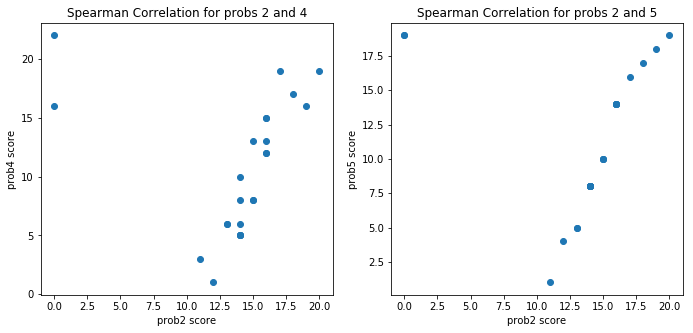

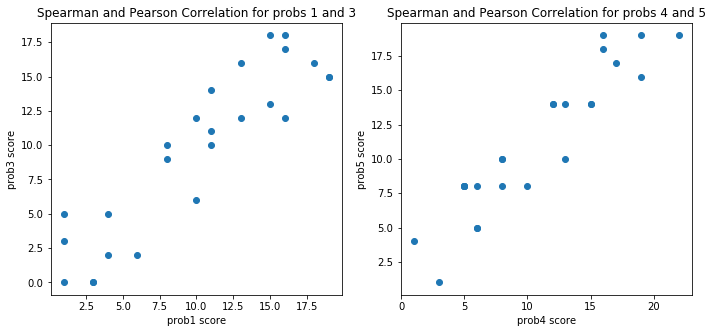

In [1161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11.5,5)) 
plt.subplot(1,2,1)
plt.plot(prob2,prob4, 'o')
plt.title('Spearman Correlation for probs 2 and 4')
plt.xlabel('prob2 score')
plt.ylabel('prob4 score')

plt.subplot(1,2,2)
plt.plot(prob2,prob5, 'o')
#plt.xlim(0,10,0.5)
plt.title('Spearman Correlation for probs 2 and 5')
plt.xlabel('prob2 score')
plt.ylabel('prob5 score')

plt.show()

plt.figure(figsize=(11.5,5)) 
plt.subplot(1,2,1)
plt.plot(prob1,prob3, 'o')
plt.title('Spearman and Pearson Correlation for probs 1 and 3')
plt.xlabel('prob1 score')
plt.ylabel('prob3 score')

plt.subplot(1,2,2)
plt.plot(prob4,prob5, 'o')
plt.title('Spearman and Pearson Correlation for probs 4 and 5')
plt.xlabel('prob4 score')
plt.ylabel('prob5 score')

plt.show()

In [1162]:
#Question 3 #Part A #Part i 

In [1163]:
fblikes = [1900, 5300, 224, 17800, 21400, 9600, 860, 147, 2800, 759, 2100, 3700, 901,
           18900, 2000, 10300, 276, 1000, 298, 39200, 1900, 21800, 36600, 3000, 628,
           1100, 5200, 2300, 788, 8900]
tweets = [157, 1100, 668, 1500, 1000, 1000, 178, 66, 209, 251, 46, 376, 89, 1400, 453,
          1900, 129, 385, 20, 2900, 192, 497, 4900, 537, 266, 258, 358, 481, 301, 2100]
comments = [366, 454, 9, 1900, 1700, 58, 630, 57, 396, 40, 476, 821, 206, 662, 606, 77,
            444, 121, 27, 573, 189, 189, 1500, 1400, 31, 141, 393, 11, 32, 1400]


pearson_fblikes_tweets = stats.pearsonr(fblikes, tweets)
pearson_fblikes_comments = stats.pearsonr(fblikes,comments)
pearson_tweets_comments = stats.pearsonr(tweets,comments)


print("Pearson correlations")
print "fblikes and tweets:",pearson_fblikes_tweets
print "fblikes and comments:",pearson_fblikes_comments
print "tweets and comments:",pearson_tweets_comments

spearman_fblikes_tweets = stats.spearmanr(fblikes, tweets)
spearman_fblikes_comments = stats.spearmanr(fblikes,comments)
spearman_tweets_comments = stats.spearmanr(tweets,comments)


print ("Spearman correlations")
print"fblikes and tweets:",spearman_fblikes_tweets 
print"fblikes and comments:",spearman_fblikes_comments
print"tweets and comments:",spearman_tweets_comments

#pair with greater Spearman correlation than Pearson correlation is fblikes and comments")

Pearson correlations
fblikes and tweets: (0.83694718969598447, 8.236412524718429e-09)
fblikes and comments: (0.50734271446655976, 0.0042148689533096995)
tweets and comments: (0.50969515653754716, 0.0040135265151552448)
Spearman correlations
fblikes and tweets: SpearmanrResult(correlation=0.76301735647530056, pvalue=9.456001835691113e-07)
fblikes and comments: SpearmanrResult(correlation=0.60765550615416419, pvalue=0.0003688055434274629)
tweets and comments: SpearmanrResult(correlation=0.38299766566244886, pvalue=0.036704550981923489)


In [ ]:
#Question 2 #Part A #Part ii

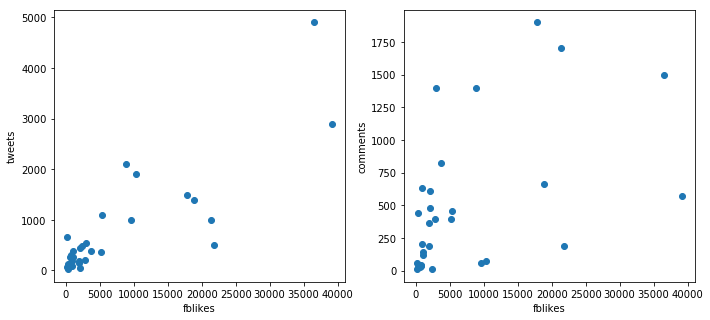

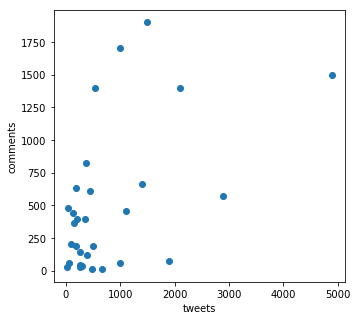

In [1164]:
plt.figure(figsize=(11.5,5)) 
plt.subplot(1,2,1)
plt.plot(fblikes,tweets, 'o')
plt.title('')
plt.xlabel('fblikes')
plt.ylabel('tweets')

plt.subplot(1,2,2)
plt.plot(fblikes,comments, 'o')
plt.title('')
plt.xlabel('fblikes')
plt.ylabel('comments')

plt.show()

plt.figure(figsize=(11.5,5)) 
plt.subplot(1,2,1)
plt.plot(tweets,comments, 'o')
#plt.xlim(0,10,0.5)
plt.title('')
plt.xlabel('tweets')
plt.ylabel('comments')

plt.show()

#Spearman correlation for the fblikes and comments pair could be greater than the Pearson correlation  
#data points are more scattered than the other two pairs and Pearson correlation is more sensitive to outliers
#implies that an increase in outliers would decrease the Pearson correlation

In [ ]:
#Question 3 #Part B #Part i

In [1166]:
from urllib import urlopen
from zipfile import ZipFile
from io import BytesIO

ps2texts=urlopen('https://courses.cit.cornell.edu/info2950_2017sp/resources/ps2data.zip')
with ZipFile(BytesIO(ps2texts.read())) as ziptexts:
    ptexts=[ziptexts.read('ps2data/p{}.txt'.format(i)).decode('utf-8') for i in range(30)]
ps2texts.close()

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import re
from scipy.stats import linregress

In [1167]:
testwords = ['of', 'in', 'trump', 'was', 'president', 'order', 'more', 'were',
             'what', 'court', 'one', 'law', 'been', 'senate', 'new', 'executive',
             'people', 'democrats', 'should', 'could', 'american', 'immigration', 'republicans', 'against',
             'government', 'up', 'national', 'some', 'down', 'obama', 'another', 'both']
counts = []
for a in range(32):
    counts.append([])
for i in ptexts: 
    a = Counter(re.findall("[a-z']+",i.lower()))
    for x in range(len(testwords)):
        counts[x].append(a[testwords[x]])       

s_fb = []
p_fb = []
s_t = []
p_t = []
s_c = []
p_c = []

for b in counts: 
    s_fb.append(list(stats.spearmanr(b,fblikes)))
    p_fb.append(stats.pearsonr(b,fblikes))
    s_t.append(list(stats.spearmanr(b,tweets)))
    p_t.append(stats.pearsonr(b,tweets))
    s_c.append(list(stats.spearmanr(b,comments)))
    p_c.append(stats.pearsonr(b,comments))
    
for i in range(32):
    if s_fb[i][1] < 0.05:
        print(testwords[i],"and fblikes: Spearman correlation of",s_fb[i])
    if p_fb[i][1] < 0.05:
        print(testwords[i],"and fblikes: Pearson correlation of",p_fb[i])
    if s_t[i][1] < 0.05:
        print(testwords[i],"and tweets: Spearman correlation of",s_t[i])
    if p_t[i][1] < 0.05:
        print(testwords[i],"and tweets: Pearson correlation of",p_t[i])
    if s_c[i][1] < 0.05:
        print(testwords[i],"and comments: Spearman correlation of",s_c[i])
    if p_c[i][1] < 0.05:
        print(testwords[i],"and comments: Pearson correlation of",p_c[i])

('of', 'and comments: Spearman correlation of', [-0.41727237686211882, 0.021781238480608259])
('in', 'and fblikes: Spearman correlation of', [-0.36827623355632549, 0.04523898700124801])
('in', 'and comments: Spearman correlation of', [-0.49603921931196676, 0.00530745110666366])
('in', 'and comments: Pearson correlation of', (-0.43095312740722291, 0.01742939168135621))
('was', 'and comments: Spearman correlation of', [-0.36791422423546494, 0.045467202816146531])
('president', 'and tweets: Pearson correlation of', (0.48951461582342765, 0.0060417865158928366))
('more', 'and fblikes: Spearman correlation of', [-0.53189146690021127, 0.0024854347369280775])
('more', 'and fblikes: Pearson correlation of', (-0.36251458158818178, 0.048981293472953179))
('more', 'and tweets: Spearman correlation of', [-0.41301794540886255, 0.023303758274154419])
('were', 'and fblikes: Spearman correlation of', [-0.41528193044727907, 0.022483042872991656])
('were', 'and comments: Spearman correlation of', [-0.558

In [ ]:
#Question 3 #Part B #Part ii 

In [1169]:
for i in range(32):
    if p_fb[i] == max(p_fb):
        print(testwords[i],"and fblikes:",max(p_fb),"position",i)
    if p_t[i] == max(p_t):
        print(testwords[i],"and tweets:",max(p_t),"position",i)
    if p_c[i] == (-0.36678408052217609, 0.046185565245395244):
        print(testwords[i],"and comments:","(-0.36678408052217609, 0.046185565245395244)","position",i)
    if p_fb[i] == min(p_fb):
        print(testwords[i],"and fblikes:",min(p_fb),"position",i)
    if p_t[i] == min(p_t):
        print(testwords[i],"and tweets:",min(p_t),"position",i)
    if p_c[i] == min(p_c):
        print(testwords[i],"and comments:",min(p_c),"position",i)

('been', 'and comments:', '(-0.36678408052217609, 0.046185565245395244)', 'position', 12)
('new', 'and fblikes:', (-0.44594917753371549, 0.013512780959768617), 'position', 14)
('new', 'and tweets:', (-0.43544033502909446, 0.016169690772701577), 'position', 14)
('should', 'and tweets:', (0.58340815303081528, 0.00071456599369123998), 'position', 18)
('national', 'and fblikes:', (0.40831088674815019, 0.025088861242820649), 'position', 26)
('another', 'and comments:', (-0.44447944666057781, 0.013860824738252987), 'position', 30)


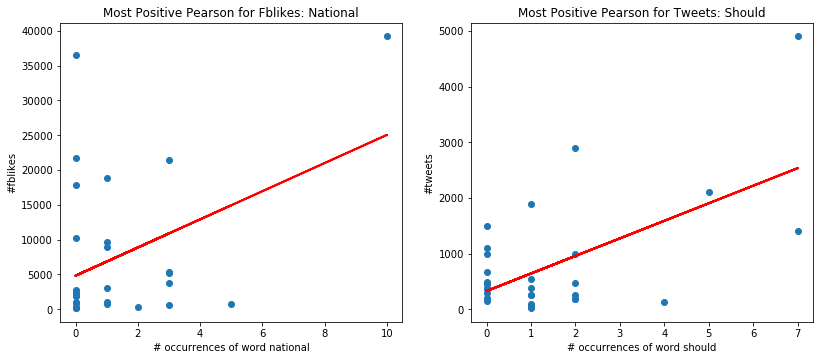

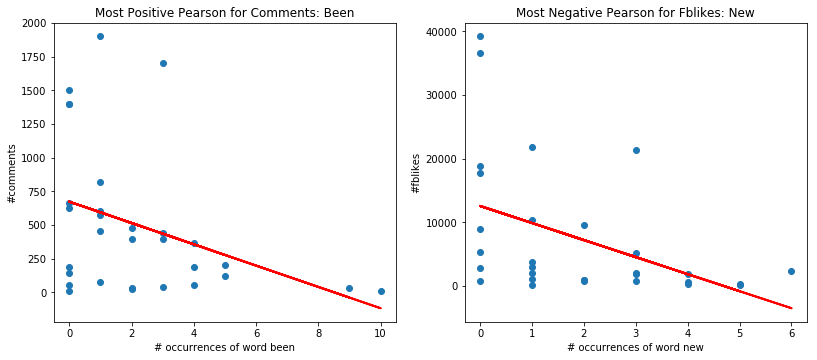

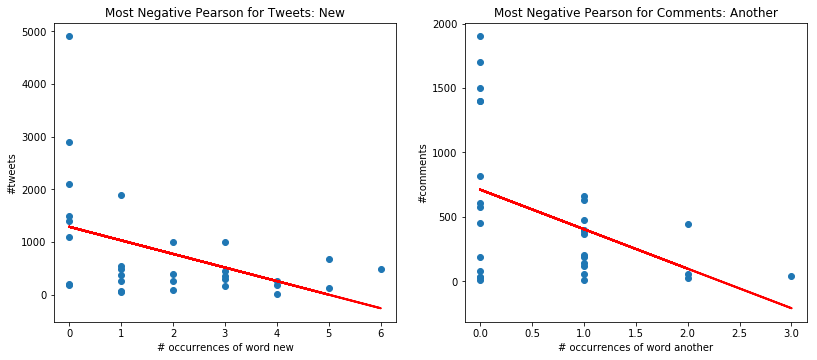

In [1170]:
another = counts[30]
new = counts[14]
national = counts[26]
should = counts[18]
been = counts[12]

plt.figure(figsize=(13.5,5.5))
plt.subplot(1,2,1)
slope1, intercept1, r_value, p_value, std_err = linregress(national,fblikes) 
plt.xlabel('# occurrences of word national'), plt.ylabel('#fblikes')
plt.title("Most Positive Pearson for Fblikes: National")
plt.plot(national, fblikes, 'o')
plt.plot(national,intercept1+list(map(lambda a: a * slope1, national)),'r',lw=2)

plt.subplot(1,2,2)
slope2, intercept2, r_value, p_value, std_err = linregress(should,tweets) 
plt.xlabel('# occurrences of word should'), plt.ylabel('#tweets')
plt.title("Most Positive Pearson for Tweets: Should")
plt.plot(should, tweets, 'o')
plt.plot(should,intercept2+list(map(lambda a: a * slope2, should)),'r',lw=2)
plt.show()

plt.figure(figsize=(13.5,5.5))
plt.subplot(1,2,1)
slope3, intercept3, r_value, p_value, std_err = linregress(been,comments) 
plt.xlabel('# occurrences of word been'), plt.ylabel('#comments')
plt.title("Most Positive Pearson for Comments: Been")
plt.plot(been, comments, 'o')
plt.plot(been,intercept3+list(map(lambda a: a * slope3, been)),'r',lw=2)

plt.subplot(1,2,2)
slope4, intercept4, r_value, p_value, std_err = linregress(new,fblikes) 
plt.xlabel('# occurrences of word new'), plt.ylabel('#fblikes')
plt.title("Most Negative Pearson for Fblikes: New")
plt.plot(new, fblikes, 'o')
plt.plot(new,intercept4+list(map(lambda a: a * slope4, new)),'r',lw=2)
plt.show()

plt.figure(figsize=(13.5,5.5))
plt.subplot(1,2,1)
slope5, intercept5, r_value, p_value, std_err = linregress(new,tweets) 
plt.xlabel('# occurrences of word new'), plt.ylabel('#tweets')
plt.title("Most Negative Pearson for Tweets: New")
plt.plot(new, tweets, 'o')
plt.plot(new,intercept5+list(map(lambda a: a * slope5, new)),'r',lw=2)

plt.subplot(1,2,2)
slope6, intercept6, r_value, p_value, std_err = linregress(another,comments) 
plt.xlabel('# occurrences of word another'), plt.ylabel('#comments')
plt.title("Most Negative Pearson for Comments: Another")
plt.plot(another, comments, 'o')
plt.plot(another,intercept6+list(map(lambda a: a * slope6, another)),'r',lw=2)
plt.show()

In [1171]:
#Question 4 #Part A 

In [1172]:
from mpl_toolkits.basemap import Basemap

In [1173]:
data = [row.split('\t') for row in open('cdc0.txt').read().split('\n')]

In [1174]:
total_death_rates = []

for x in data:
    if len(x) >= 12:
        if x[5] == '"Not Hispanic or Latino"':
            if x[0] == '"Total"':
                if x[1] == '"White"':
                    total_death_rates.append(float(x[11]))
                

#print len(total_death_rates)

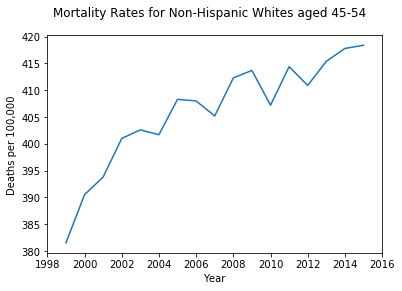

In [1175]:
x=np.arange(1999,2016)
#print len(x)
plt.plot(x,total_death_rates)
plt.suptitle("Mortality Rates for Non-Hispanic Whites aged 45-54")
plt.xlabel("Year")
plt.ylabel("Deaths per 100,000")
plt.xticks(list(range(1998,2018,2)))
plt.show()

In [1176]:
#Question 4 #Part B #Part i 

In [1177]:
total_male_death = []
total_female_death = []

for x in data:
    if len(x) >= 12:
        if x[5] == '"Not Hispanic or Latino"':
            if x[1] == '"White"':
                if x[7] == '"Female"':
                    total_female_death.append(float(x[11]))
                elif x[7] == '"Male"':
                    total_male_death.append(float(x[11]))
print len(total_male_death)

17


In [1178]:
male_death_relative = []
female_death_relative = []

for x in total_male_death:
    rel = x/total_male_death[0]
    male_death_relative.append(rel)
    
for x in total_female_death:
    rel = x/total_female_death[0]
    female_death_relative.append(rel)
    

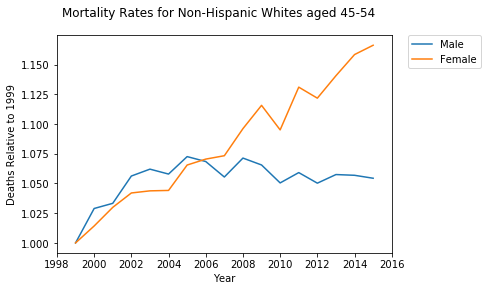

In [1179]:
x = np.arange(1999,2016)
plt.plot(x,male_death_relative, label = 'Male')
plt.plot(x,female_death_relative, label = 'Female')
plt.suptitle("Mortality Rates for Non-Hispanic Whites aged 45-54")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.xlabel("Year")
plt.ylabel("Deaths Relative to 1999")
plt.xticks(list(range(1998,2018,2)))

plt.show()

In [1180]:
#Question 4 #Part B #Part ii 

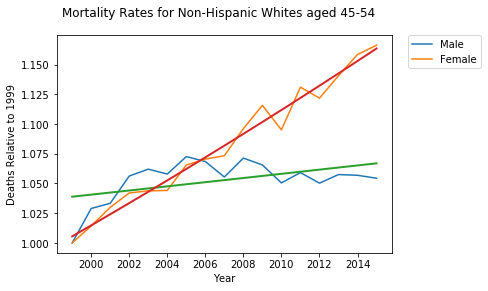

In [1181]:
x = np.arange(1999,2016)
plt.plot(x,male_death_relative, label = 'Male')
plt.plot(x,female_death_relative, label = 'Female')
plt.suptitle("Mortality Rates for Non-Hispanic Whites aged 45-54")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.xlabel("Year")
plt.ylabel("Deaths Relative to 1999")
plt.xticks(list(range(1998,2018,2)))

logdatax1, logdatay1 = map(np.log, (x, male_death_relative))
slope, intercept, r_value, p_value, std_err = stats.linregress(logdatax1, logdatay1)
plt.plot(x,np.exp(intercept)*x**slope,lw=2)

logdatax2, logdatay2 = map(np.log, (x, female_death_relative))
slope, intercept, r_value, p_value, std_err = stats.linregress(logdatax2, logdatay2)
plt.plot(x,np.exp(intercept)*x**slope,lw=2)

plt.show()

In [1182]:
#Males 

#slope = 3.34 
#smoothed rate of overall increase = 53.5036024123

linregress(logdatax1, logdatay1)

LinregressResult(slope=3.3439751507693458, intercept=-25.377444923866822, rvalue=0.48912008563374948, pvalue=0.046310438021526873, stderr=1.5396648303053122)

In [1183]:
#Females 

#slope = 18.301
#smoothed rate of overall increase = 292.8179320412

linregress(logdatax2, logdatay2)

LinregressResult(slope=18.301120752576811, intercept=-139.09038178253937, rvalue=0.98764420900569305, pvalue=1.7297720792345899e-13, stderr=0.74978394365632317)

In [1184]:
#Question 4 #Part C #Part i 

In [1185]:
data2 = [row.split('\t') for row in open('cdc1.txt').read().split('\n')]

male1 = []
male2 = []
male3 = []
male4 = []
male5 = []
male6 = []
male7 = []
male8 = []
male9 = []
male10 = []

female1 = []
female2 = []
female3 = []
female4 = []
female5 = []
female6 = []
female7 = []
female8 = []
female9 = []
female10 = []


for x in data2:
    if len(x) >= 12:
        if x[5] == '"Not Hispanic or Latino"':
            if x[1] == '"White"':
                if x[7] == '"Female"':
                    if x[10] == '"HHS1"':
                        female1.append(x[13])
                    elif x[10] == '"HHS2"':
                        female2.append(x[13])
                    elif x[10] == '"HHS3"':
                        female3.append(x[13])
                    elif x[10] == '"HHS4"':
                        female4.append(x[13])
                    elif x[10] == '"HHS5"':
                        female5.append(x[13])
                    elif x[10] == '"HHS6"':
                        female6.append(x[13])
                    elif x[10] == '"HHS7"':
                        female7.append(x[13])
                    elif x[10] == '"HHS8"':
                        female8.append(x[13])    
                    elif x[10] == '"HHS9"':
                        female9.append(x[13])
                    elif x[10] == '"HHS10"':
                        female10.append(x[13])
                elif x[7] == '"Male"':
                    if x[10] == '"HHS1"':
                        male1.append(x[13])
                    elif x[10] == '"HHS2"':
                        male2.append(x[13])
                    elif x[10] == '"HHS3"':
                        male3.append(x[13])
                    elif x[10] == '"HHS4"':
                        male4.append(x[13])
                    elif x[10] == '"HHS5"':
                        male5.append(x[13])
                    elif x[10] == '"HHS6"':
                        male6.append(x[13])
                    elif x[10] == '"HHS7"':
                        male7.append(x[13])
                    elif x[10] == '"HHS8"':
                        male8.append(x[13])    
                    elif x[10] == '"HHS9"':
                        male9.append(x[13])
                    elif x[10] == '"HHS10"':
                        male10.append(x[13])



In [1186]:
males = [male1, male2, male3, male4, male5, male6, male7, male8, male9, male10]
females = [female1, female2, female3, female4, female5, female6, female7, female8, female9, female10]

#print females 

rel_male_2 = []
rel_female_2 = []

for x in males: 
    a_list = []
    for y in x:
        rel = float(y)/float(x[0])
        a_list.append(rel)
    rel_male_2.append(a_list)
#print len(a_list)

for x in females: 
    b_list = []
    for y in x:
        rel = float(y)/float(x[0])
        b_list.append(rel)
    rel_female_2.append(b_list)

In [1187]:
y = np.arange(1999,2016)
counter = 0
slopelist = []
for x in rel_male_2:
    counter+=1
    logxdata, logydata = map(np.log,(y,x))
    slope = linregress(logxdata, logydata)[0]/100.0
    slopelist.append(slope)
    print ("Slope for men in Region " + str(counter) + " is " + str(slope) + " and the smoothed rate of overall increase is " + str(slope*16))

Slope for men in Region 1 is 0.00383655941014 and the smoothed rate of overall increase is 0.0613849505622
Slope for men in Region 2 is -0.175902004407 and the smoothed rate of overall increase is -2.81443207051
Slope for men in Region 3 is 0.048254244099 and the smoothed rate of overall increase is 0.772067905584
Slope for men in Region 4 is 0.0819990863517 and the smoothed rate of overall increase is 1.31198538163
Slope for men in Region 5 is 0.0551350983063 and the smoothed rate of overall increase is 0.882161572901
Slope for men in Region 6 is 0.0824900658707 and the smoothed rate of overall increase is 1.31984105393
Slope for men in Region 7 is 0.167708534096 and the smoothed rate of overall increase is 2.68333654553
Slope for men in Region 8 is 0.0812508141605 and the smoothed rate of overall increase is 1.30001302657
Slope for men in Region 9 is -0.140326271177 and the smoothed rate of overall increase is -2.24522033884
Slope for men in Region 10 is 0.0369129040404 and the smoot

In [1188]:
y = np.arange(1999,2016)
slopelist_2 = []
counter = 0
for x in rel_female_2:
    counter+=1
    logxdata, logydata = map(np.log,(y,x))
    slope = linregress(logxdata, logydata)[0]/100.0
    slopelist_2.append(slope)
    print ("Slope for women in Region " + str(counter) + " is " + str(slope) + " and the smoothed rate of overall increase is " + str(slope*16))

Slope for women in Region 1 is -0.0191103889402 and the smoothed rate of overall increase is -0.305766223043
Slope for women in Region 2 is -0.132950024666 and the smoothed rate of overall increase is -2.12720039465
Slope for women in Region 3 is 0.171056279429 and the smoothed rate of overall increase is 2.73690047087
Slope for women in Region 4 is 0.329021128321 and the smoothed rate of overall increase is 5.26433805314
Slope for women in Region 5 is 0.171302162574 and the smoothed rate of overall increase is 2.74083460118
Slope for women in Region 6 is 0.293033598273 and the smoothed rate of overall increase is 4.68853757236
Slope for women in Region 7 is 0.303035702381 and the smoothed rate of overall increase is 4.84857123809
Slope for women in Region 8 is 0.184512889058 and the smoothed rate of overall increase is 2.95220622493
Slope for women in Region 9 is 0.0111525830915 and the smoothed rate of overall increase is 0.178441329465
Slope for women in Region 10 is 0.178386317352 

In [1189]:
#Question 4 #Part C #Part ii

In [1190]:
newlist = []
for i in slopelist:
    newlist.append(i*16)
print newlist

male_list = {}

male_list['Connecticut'] = slopelist[0]*16
male_list['Maine'] = slopelist[0]*16
male_list['Rhode Island'] = slopelist[0]*16
male_list['Vermont'] = slopelist[0]*16
male_list['Massachusetts'] = slopelist[0]*16
male_list['New Hampshire'] = slopelist[0]*16

male_list['New Jersey'] = slopelist[1]*16
male_list['New York'] = slopelist[1]*16

male_list['Delaware'] = slopelist[2]*16
male_list['Virginia'] = slopelist[2]*16
male_list['West Virginia'] = slopelist[2]*16
male_list['Maryland'] = slopelist[2]*16
male_list['Pennsylvania'] = slopelist[2]*16

male_list['Alabama'] = slopelist[3]*16
male_list['Florida'] = slopelist[3]*16
male_list['Mississippi'] = slopelist[3]*16
male_list['North Carolina'] = slopelist[3]*16
male_list['South Carolina'] = slopelist[3]*16
male_list['Georgia'] = slopelist[3]*16
male_list['Kentucky'] = slopelist[3]*16
male_list['Tennessee'] = slopelist[3]*16

male_list['Illinois'] = slopelist[4]*16
male_list['Minnesota'] = slopelist[4]*16
male_list['Ohio'] = slopelist[4]*16
male_list['Indiana'] = slopelist[4]*16
male_list['Michigan'] = slopelist[4]*16
male_list['Wisconsin'] = slopelist[4]*16

male_list['Arkansas'] = slopelist[5]*16
male_list['Oklahoma'] = slopelist[5]*16
male_list['Texas'] = slopelist[5]*16
male_list['Louisiana'] = slopelist[5]*16
male_list['New Mexico'] = slopelist[5]*16

male_list['Iowa'] =slopelist[6]*16
male_list['Missouri'] =slopelist[6]*16
male_list['Nebraska'] =slopelist[6]*16
male_list['Kansas'] =slopelist[6]*16

male_list['Colorado'] = slopelist[7]*16
male_list['Utah'] = slopelist[7]*16
male_list['Wyoming'] = slopelist[7]*16
male_list['Montana'] = slopelist[7]*16
male_list['North Dakota'] = slopelist[7]*16
male_list['South Dakota'] = slopelist[7]*16

male_list['Arizona'] = slopelist[8]*16
male_list['California'] = slopelist[8]*16
male_list['Nevada'] = slopelist[8]*16

male_list['Alaska'] = slopelist[9]*16
male_list['Washington'] = slopelist[9]*16
male_list['Idaho'] = slopelist[9]*16
male_list['Oregon'] = slopelist[9]*16

   

[0.06138495056223775, -2.814432070506971, 0.77206790558437233, 1.3119853816274289, 0.88216157290117148, 1.3198410539308092, 2.6833365455298237, 1.3000130265672483, -2.2452203388352663, 0.59060646464591504]


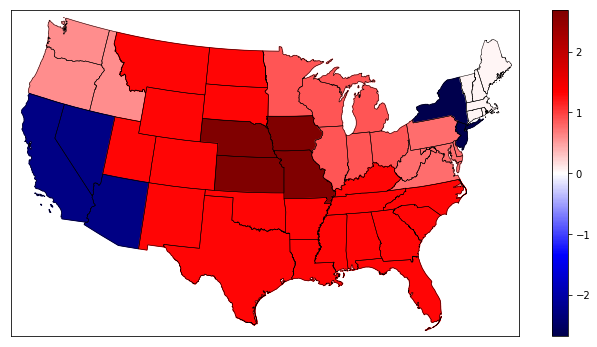

In [1199]:
import matplotlib.cm as cm

mycmap = plt.cm.get_cmap('seismic')

r = abs(max([male_list[i] for i in male_list]))

plt.figure(figsize = (12,6))

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
             projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.readshapefile('geodata/st99_d90','states',drawbounds=True)

for polygon,info in zip(m.states,m.states_info):
    state=info['NAME']
    if state !='Alaska' and state != 'Hawaii' and state !='District of Columbia': 
        xdata,ydata = zip(*polygon)
        clr = mycmap(0.5 + (male_list[state])/r*0.5)
        plt.fill(xdata,ydata,color=clr)
    
sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=-r, vmax=r))
sm.A = []
sm.set_array(r) 
plt.colorbar(sm);

plt.show()

In [1193]:
newlist_2 = []
for i in slopelist_2:
    newlist_2.append(i*16)
print newlist_2

female_list = {}

female_list['Connecticut'] = slopelist_2[0]*16
female_list['Maine'] = slopelist_2[0]*16
female_list['Rhode Island'] = slopelist_2[0]*16
female_list['Vermont'] = slopelist_2[0]*16
female_list['Massachusetts'] = slopelist_2[0]*16
female_list['New Hampshire'] = slopelist_2[0]*16

female_list['New Jersey'] = slopelist_2[1]*16
female_list['New York'] = slopelist_2[1]*16

female_list['Delaware'] = slopelist_2[2]*16
female_list['Virginia'] = slopelist_2[2]*16
female_list['West Virginia'] = slopelist_2[2]*16
female_list['Maryland'] = slopelist_2[2]*16
female_list['Pennsylvania'] = slopelist_2[2]*16

female_list['Alabama'] = slopelist_2[3]*16
female_list['Florida'] = slopelist_2[3]*16
female_list['Mississippi'] = slopelist_2[3]*16
female_list['North Carolina'] = slopelist_2[3]*16
female_list['South Carolina'] = slopelist_2[3]*16
female_list['Georgia'] = slopelist_2[3]*16
female_list['Kentucky'] = slopelist_2[3]*16
female_list['Tennessee'] = slopelist_2[3]*16

female_list['Illinois'] = slopelist_2[4]*16
female_list['Minnesota'] = slopelist_2[4]*16
female_list['Ohio'] = slopelist_2[4]*16
female_list['Indiana'] = slopelist_2[4]*16
female_list['Michigan'] = slopelist_2[4]*16
female_list['Wisconsin'] = slopelist_2[4]*16

female_list['Arkansas'] = slopelist_2[5]*16
female_list['Oklahoma'] = slopelist_2[5]*16
female_list['Texas'] = slopelist_2[5]*16
female_list['Louisiana'] = slopelist_2[5]*16
female_list['New Mexico'] = slopelist_2[5]*16

female_list['Iowa'] =slopelist_2[6]*16
female_list['Missouri'] =slopelist_2[6]*16
female_list['Nebraska'] =slopelist_2[6]*16
female_list['Kansas'] =slopelist_2[6]*16

female_list['Colorado'] = slopelist_2[7]*16
female_list['Utah'] = slopelist_2[7]*16
female_list['Wyoming'] = slopelist_2[7]*16
female_list['Montana'] = slopelist_2[7]*16
female_list['North Dakota'] = slopelist_2[7]*16
female_list['South Dakota'] = slopelist_2[7]*16

female_list['Arizona'] = slopelist_2[8]*16
female_list['California'] = slopelist_2[8]*16
female_list['Nevada'] = slopelist_2[8]*16

female_list['Alaska'] = slopelist_2[9]*16
female_list['Washington'] = slopelist_2[9]*16
female_list['Idaho'] = slopelist_2[9]*16
female_list['Oregon'] = slopelist_2[9]*16


[-0.30576622304301782, -2.1272003946526667, 2.7369004708652325, 5.2643380531429003, 2.7408346011835958, 4.6885375723635958, 4.8485712380891606, 2.9522062249293999, 0.17844132946464061, 2.8541810776243222]


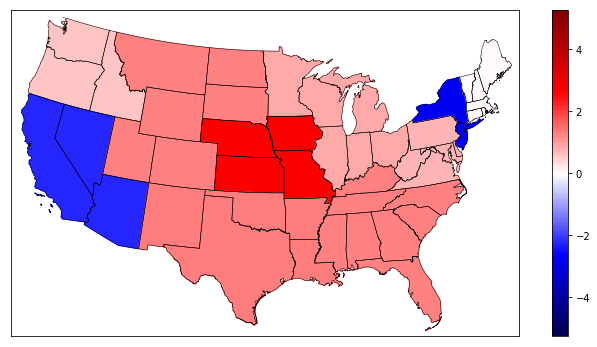

In [1194]:
import matplotlib.cm as cm

mycmap = plt.cm.get_cmap('seismic')

r = abs(max([female_list[i] for i in male_list]))

plt.figure(figsize = (12,6))

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
             projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.readshapefile('geodata/st99_d90','states',drawbounds=True)

for polygon,info in zip(m.states,m.states_info):
    state=info['NAME']
    if state !='Alaska' and state != 'Hawaii' and state !='District of Columbia': 
        xdata,ydata = zip(*polygon)
        clr = mycmap(0.5 + (male_list[state])/r*0.5)
        plt.fill(xdata,ydata,color=clr)
    
sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=-r, vmax=r))
sm.A = []
sm.set_array(r) 
plt.colorbar(sm);

plt.show()